In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
df = pd.read_csv('car-mpg.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [4]:
df = df.drop('car_name', axis=1)

In [5]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [6]:
temp = pd.DataFrame(df.hp.str.isdigit())
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [7]:
df = df.replace('?', np.nan)

In [8]:
df = df.apply(lambda x: x.fillna(x.median()), axis=0)

In [9]:
df['hp'] = df['hp'].astype('float64')

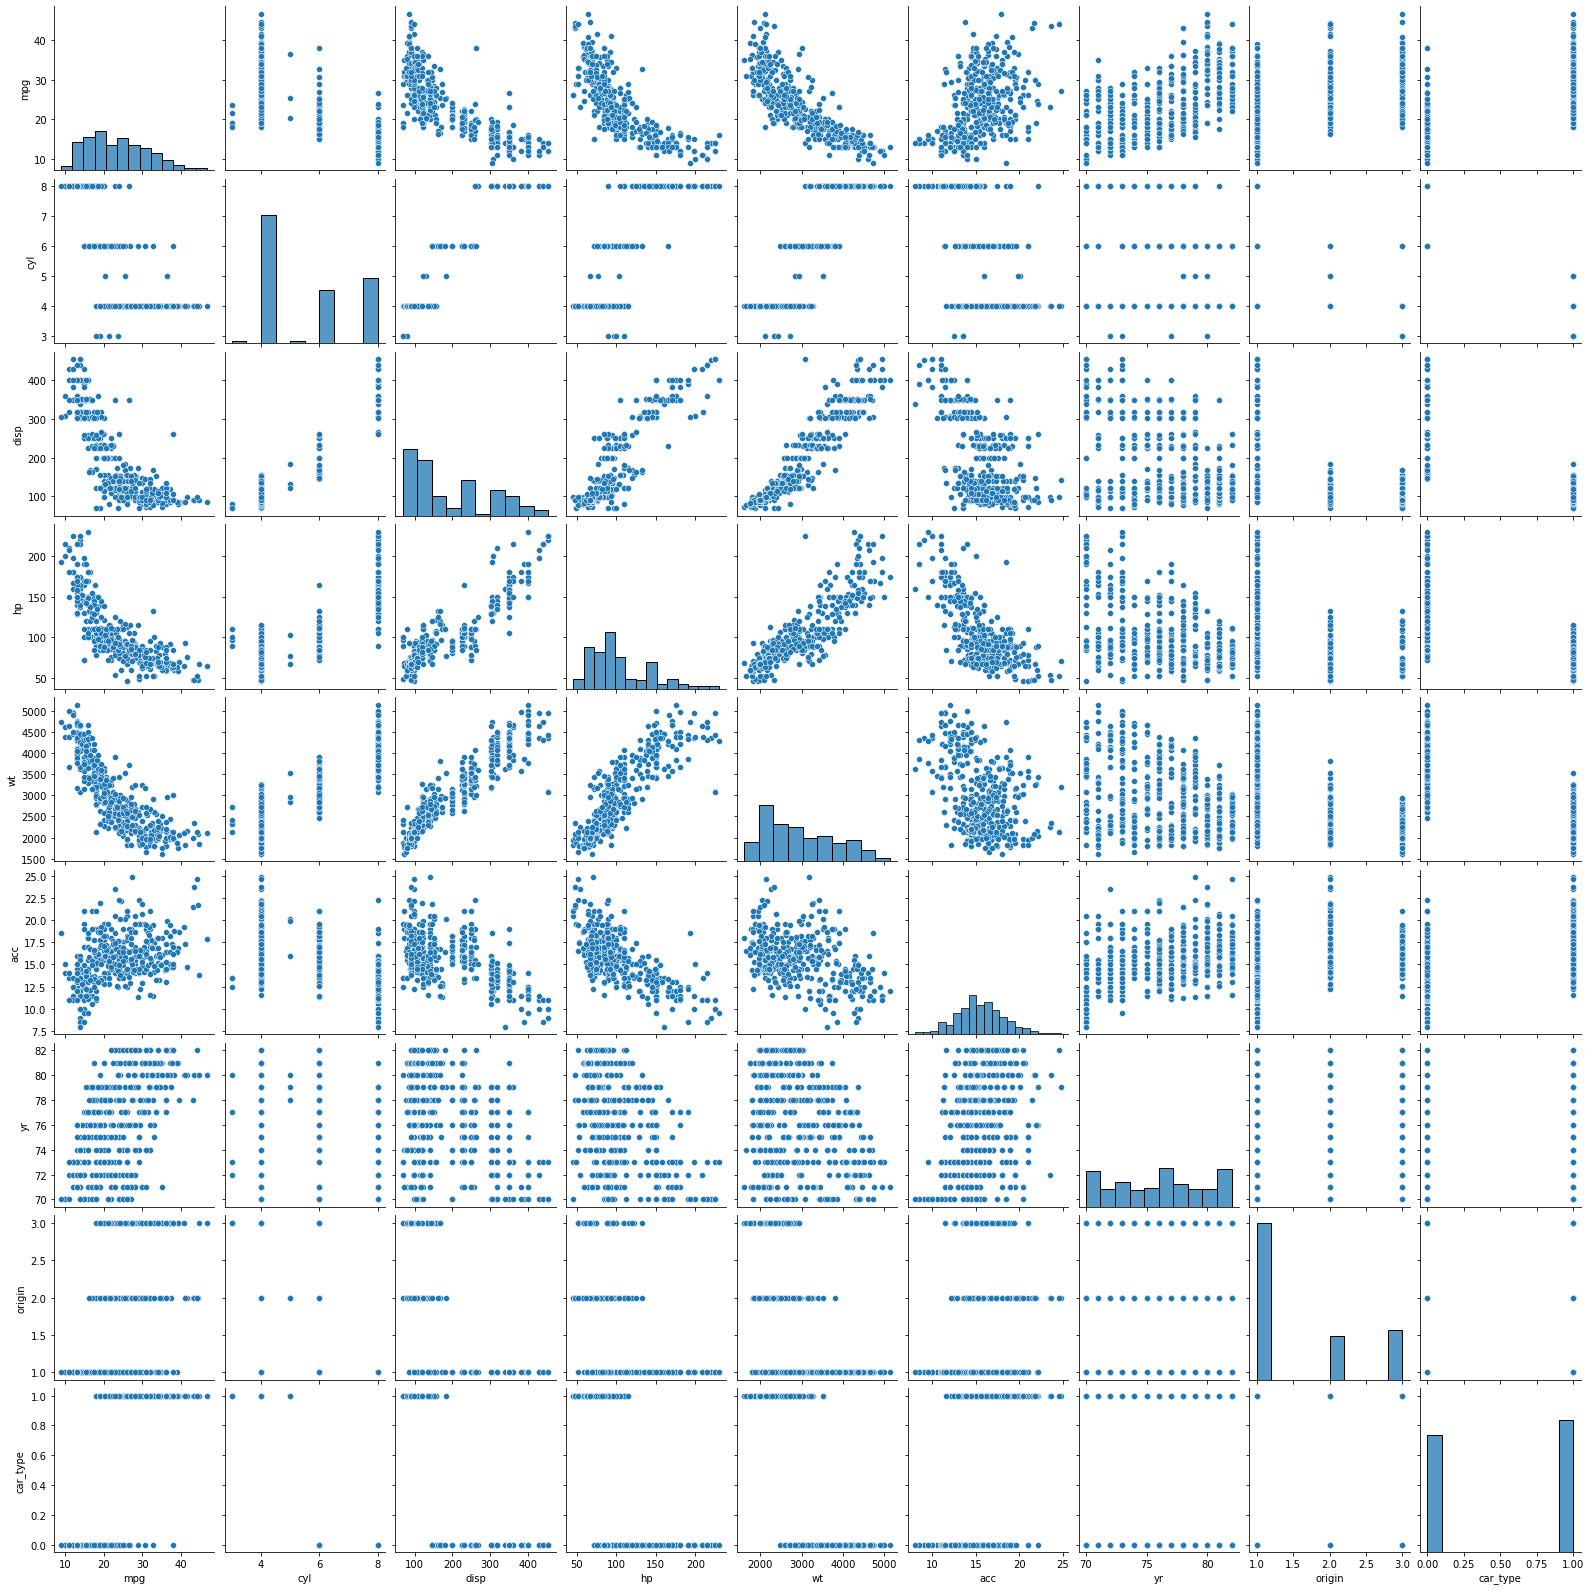

In [10]:
import seaborn as sns

sns.pairplot(data=df)

<AxesSubplot:>

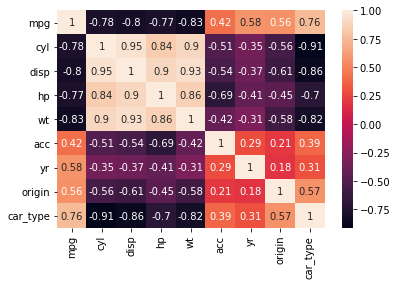

In [11]:
sns.heatmap(df.corr(), annot=True)

In [12]:
df['Origin'] = df['origin'].map(lambda x: {1:'USA',2:'Europe',3:'Japan'}.get(x))

In [13]:
df = pd.get_dummies(df, columns=['origin'])

In [14]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,Origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,0,USA,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,USA,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,USA,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,USA,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,USA,1,0,0


In [15]:
df = df.drop('Origin', axis=1)

In [16]:
from sklearn.model_selection import train_test_split as tts

In [17]:
x = df.iloc[:,1:10]
y = df.mpg

x_train, x_test, y_train, y_test = tts(x, y, test_size=.3, random_state=1)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

ncols = x_train.shape[0]

model = Sequential()

model.add(Dense(20, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='relu', kernel_initializer='normal'))

model.add(Dense(1))

In [21]:
optimizer = tf.keras.optimizers.Adam(.01)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae', 'mse'])

epochs = 50

In [22]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=.2, verbose=False)

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      50 non-null     float64
 1   mae       50 non-null     float64
 2   mse       50 non-null     float64
 3   val_loss  50 non-null     float64
 4   val_mae   50 non-null     float64
 5   val_mse   50 non-null     float64
 6   epoch     50 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.9 KB
None


In [24]:
hist.head(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,622.510254,23.622967,622.510254,529.450012,21.936083,529.450012,0
1,561.595215,22.372900,561.595215,436.596680,19.702860,436.596680,1
2,418.552338,19.015772,418.552338,266.961426,14.558714,266.961426,2
3,209.490051,12.800313,209.490051,109.058716,8.650194,109.058716,3
4,75.080933,7.445345,75.080933,97.750534,8.653522,97.750534,4
5,79.433441,7.559108,79.433441,62.151432,6.568830,62.151432,5
6,40.332283,5.327073,40.332283,37.330784,4.339051,37.330784,6
7,30.387941,4.331923,30.387941,31.066029,4.046474,31.066029,7
8,22.230852,3.770784,22.230852,25.886204,3.797977,25.886204,8
9,17.411785,3.321210,17.411785,24.141985,3.740205,24.141985,9


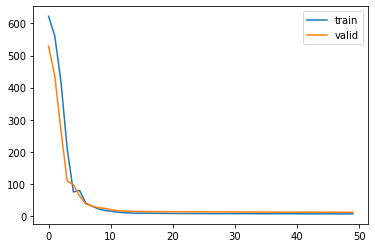

In [25]:
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(('train', 'valid'), loc=0)

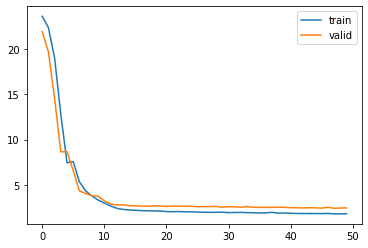

In [26]:
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(('train', 'valid'), loc=0)

In [27]:
loss = model.evaluate(x_test, y_test, verbose=False)

In [28]:
y_pred = np.round(model.predict(x_test))

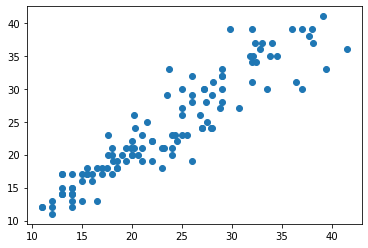

In [29]:
plt.scatter(y_test, y_pred)